<a href="https://colab.research.google.com/github/vinidias/AI-Resume-Parser/blob/master/EDA_RJ_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [5]:
import pandas as pd

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns


**Load The Data**

In [7]:
rj_df = pd.read_csv("/content/sample_data/dataset_rj.csv")

In [ ]:
rj_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,4,265,2021-05-21,2.07,1,314,12,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,297,3,85,2017-04-22,0.86,1,30,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.86,2,266,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,271,2,181,2019-12-06,1.92,1,151,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,121,3,371,2019-06-15,3.05,1,30,35,NaN


Drop unnecessary collumns

In [8]:
rj_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

print(rj_df.head())

   host_id  neighbourhood_group  ... number_of_reviews_ltm  license
0    68997                  NaN  ...                    12      NaN
1    99249                  NaN  ...                     0      NaN
2   102840                  NaN  ...                     0      NaN
3   153232                  NaN  ...                     0      NaN
4   153691                  NaN  ...                    35      NaN

[5 rows x 14 columns]


Replacing all NaN values in "review_per_month" with 0

In [9]:
rj_df.reviews_per_month.fillna(0, inplace=True)

print(rj_df.isnull().any())

host_id                           False
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool


Grouping neighbourhoods 


In [10]:
zonas_dict = {
'Botafogo': 'Zona-Sul', 
'Catete': 'Zona-Sul', 
'Copacabana': 'Zona-Sul', 
'Cosme Velho': 'Zona-Sul', 
'Flamengo': 'Zona-Sul' ,
'Gávea': 'Zona-Sul' ,
'Glória': 'Zona-Sul',
'Humaitá': 'Zona-Sul', 
'Ipanema': 'Zona-Sul' ,
'Jardim Botânico': 'Zona-Sul', 
'Lagoa': 'Zona-Sul' ,
'Laranjeiras': 'Zona-Sul' ,
'Leblon': 'Zona-Sul' ,
'Leme': 'Zona-Sul' ,
'São Conrado': 'Zona-Sul' ,
'Urca': 'Zona-Sul' ,
'Vidigal': 'Zona-Sul' ,
'Rocinha': 'Zona-Sul',

'Alto da Boa Vista': 'Zona-Norte' ,
'Andaraí': 'Zona-Norte'  ,
'Grajaú': 'Zona-Norte'  ,
'Maracanã': 'Zona-Norte'  ,
'Praça da Bandeira': 'Zona-Norte'  ,
'Tijuca': 'Zona-Norte'  ,
'Vila Isabel Abolição': 'Zona-Norte'  ,
'Água Santa': 'Zona-Norte'  ,
'Cachambi': 'Zona-Norte'  ,
'Encantado': 'Zona-Norte'  ,
'Engenho de Dentro': 'Zona-Norte' ,
'Engenho Novo': 'Zona-Norte'  ,
'Higienópolis': 'Zona-Norte'  ,
'Jacaré': 'Zona-Norte'  ,
'Jacarezinho': 'Zona-Norte'  ,
'Lins de Vasconcelos': 'Zona-Norte'  ,
'Manguinhos': 'Zona-Norte'  ,
'Maria da Graça': 'Zona-Norte'  ,
'Méier': 'Zona-Norte'  ,
'Piedade': 'Zona-Norte'  ,
'Pilares': 'Zona-Norte'  ,
'Riachuelo': 'Zona-Norte'  ,
'Rocha': 'Zona-Norte'  ,
'Sampaio': 'Zona-Norte'  ,
'São Francisco Xavier': 'Zona-Norte'  ,
'Todos os Santos': 'Zona-Norte'  ,
'Bonsucesso': 'Zona-Norte'  ,
'Bancários': 'Zona-Norte'  ,
'Cacuia': 'Zona-Norte'  ,
'Cidade Universitária': 'Zona-Norte'  ,
'Cocotá': 'Zona-Norte'  ,
'Freguesia': 'Zona-Norte'  ,
'Galeão': 'Zona-Norte'  ,
'Jardim Carioca': 'Zona-Norte'  ,
'Jardim Guanabara': 'Zona-Norte'  ,
'Maré ': 'Zona-Norte' ,
'Moneró ': 'Zona-Norte' ,
'Olaria': 'Zona-Norte'  ,
'Pitangueiras': 'Zona-Norte'  ,
'Portuguesa': 'Zona-Norte'  ,
'Praia da Bandeira': 'Zona-Norte'  ,
'Ramos': 'Zona-Norte'  ,
'Ribeira': 'Zona-Norte'  ,
'Tauá': 'Zona-Norte'  ,
'Zumbi': 'Zona-Norte'  ,
'Acari': 'Zona-Norte'  ,
'Anchieta': 'Zona-Norte' ,
'Barros Filho': 'Zona-Norte'  ,
'Bento Ribeiro': 'Zona-Norte'  ,
'Brás de Pina': 'Zona-Norte'  ,
'Campinho': 'Zona-Norte'  ,
'Cavalcanti': 'Zona-Norte'  ,
'Cascadura': 'Zona-Norte'  ,
'Coelho Neto': 'Zona-Norte'  ,
'Colégio': 'Zona-Norte'  ,
'Complexo do Alemão': 'Zona-Norte'  ,
'Cordovil': 'Zona-Norte'  ,
'Costa Barros': 'Zona-Norte'  ,
'Engenheiro Leal': 'Zona-Norte'  ,
'Engenho da Rainha': 'Zona-Norte'  ,
'Guadalupe': 'Zona-Norte'  ,
'Honório Gurgel': 'Zona-Norte'  ,
'Inhaúma': 'Zona-Norte'  ,
'Irajá': 'Zona-Norte'  ,
'Jardim América': 'Zona-Norte'  ,
'Madureira': 'Zona-Norte'  ,
'Marechal Hermes': 'Zona-Norte'  ,
'Oswaldo Cruz': 'Zona-Norte'  ,
'Parada de Lucas': 'Zona-Norte'  ,
'Parque Anchieta': 'Zona-Norte'  ,
'Parque Colúmbia': 'Zona-Norte'  ,
'Pavuna': 'Zona-Norte'  ,
'Penha': 'Zona-Norte'  ,
'Penha Circular': 'Zona-Norte'  ,
'Quintino Bocaiuva': 'Zona-Norte'  ,
'Ricardo de Albuquerque': 'Zona-Norte'  ,
'Rocha Miranda': 'Zona-Norte'  ,
'Tomás Coelho': 'Zona-Norte'  ,
'Turiaçu': 'Zona-Norte'  ,
'Vaz Lobo': 'Zona-Norte',
'Vicente de Carvalho': 'Zona-Norte'  ,
'Vigário Geral': 'Zona-Norte'  ,
'Vila da Penha': 'Zona-Norte'  ,
'Vila Kosmos': 'Zona-Norte'  ,
'Vista Alegre': 'Zona-Norte' ,

'Anil': 'Zona-Oeste' ,
'Barra da Tijuca': 'Zona-Oeste'  ,
'Camorim': 'Zona-Oeste'  ,
'Cidade de Deus': 'Zona-Oeste'  ,
'Curicica': 'Zona-Oeste'  ,
'Freguesia de Jacarepaguá': 'Zona-Oeste'  ,
'Gardênia Azul': 'Zona-Oeste'  ,
'Grumari': 'Zona-Oeste'  ,
'Itanhangá': 'Zona-Oeste'  ,
'Jacarepaguá': 'Zona-Oeste'  ,
'Joá': 'Zona-Oeste'  ,
'Praça Seca': 'Zona-Oeste'  ,
'Pechincha': 'Zona-Oeste'  ,
'Rio das Pedras': 'Zona-Oeste'  ,
'Recreio dos Bandeirantes': 'Zona-Oeste'  ,
'Tanque': 'Zona-Oeste'  ,
'Taquara': 'Zona-Oeste'  ,
'Vargem Grande': 'Zona-Oeste'  ,
'Vargem Pequena': 'Zona-Oeste'  ,
'Vila Valqueire': 'Zona-Oeste'  ,
'Jardim Sulacap': 'Zona-Oeste' ,
'Bangu': 'Zona-Oeste'  ,
'Campo dos Afonsos': 'Zona-Oeste'  ,
'Deodoro': 'Zona-Oeste'  ,
'Gericinó': 'Zona-Oeste'  ,
'Jabour': 'Zona-Oeste'  ,
'Magalhães Bastos': 'Zona-Oeste'  ,
'Padre Miguel': 'Zona-Oeste'  ,
'Realengo': 'Zona-Oeste'  ,
'Santíssimo': 'Zona-Oeste'  ,
'Senador Camará': 'Zona-Oeste'  ,
'Vila Kennedy': 'Zona-Oeste'  ,
'Vila Militar': 'Zona-Oeste' ,
'Barra de Guaratiba': 'Zona-Oeste' , 
'Campo Grande': 'Zona-Oeste'  ,
'Cosmos': 'Zona-Oeste'  ,
'Guaratiba': 'Zona-Oeste'  ,
'Inhoaíba': 'Zona-Oeste'  ,
'Paciência': 'Zona-Oeste'  ,
'Pedra de Guaratiba': 'Zona-Oeste'  ,
'Santa Cruz': 'Zona-Oeste'  ,
'Senador Vasconcelos': 'Zona-Oeste'  ,
'Sepetiba': 'Zona-Oeste',

'Bairro Imperial de São Cristóvão': 'Zona-Central' ,
'Benfica': 'Zona-Central'  ,
'Caju': 'Zona-Central'  ,
'Catumbi': 'Zona-Central'  ,
'Centro': 'Zona-Central'  ,
'Cidade Nova': 'Zona-Central'  ,
'Estácio': 'Zona-Central'  ,
'Gamboa': 'Zona-Central'  ,
'Lapa': 'Zona-Central'  ,
'Mangueira': 'Zona-Central'  ,
'Paquetá': 'Zona-Central'  ,
'Rio Comprido': 'Zona-Central'  ,
'Santa Teresa': 'Zona-Central'  ,
'Santo Cristo': 'Zona-Central'  ,
'Saúde': 'Zona-Central'  ,
'Vasco da Gama': 'Zona-Central' ,
}
rj_df['Zona'] = rj_df['neighbourhood'].map(zonas_dict)
print(rj_df)

         host_id  neighbourhood_group  ... license        Zona
0          68997                  NaN  ...     NaN    Zona-Sul
1          99249                  NaN  ...     NaN    Zona-Sul
2         102840                  NaN  ...     NaN    Zona-Sul
3         153232                  NaN  ...     NaN    Zona-Sul
4         153691                  NaN  ...     NaN    Zona-Sul
...          ...                  ...  ...     ...         ...
23409   49194316                  NaN  ...     NaN    Zona-Sul
23410  421418906                  NaN  ...     NaN    Zona-Sul
23411   18896247                  NaN  ...     NaN    Zona-Sul
23412   70646886                  NaN  ...     NaN  Zona-Oeste
23413   70646886                  NaN  ...     NaN  Zona-Oeste

[23414 rows x 15 columns]


**Exploration Data and Visualizing**

Neigbourhood Group


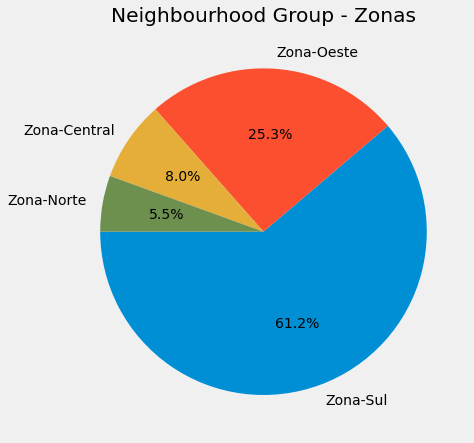

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group - Zonas")

g = plt.pie(rj_df.Zona.value_counts(), labels=rj_df.Zona.value_counts().index,autopct='%1.1f%%', startangle=180)

plt.show()

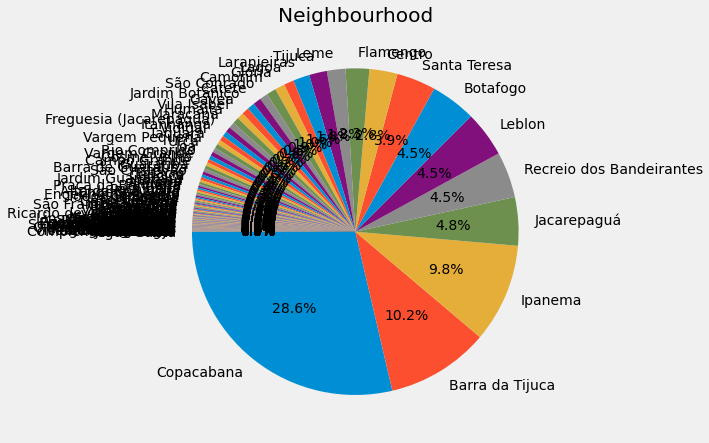

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood")
g = plt.pie(rj_df.neighbourhood.value_counts(), labels=rj_df.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

Map of Neighbourhood by price


No handles with labels found to put in legend.


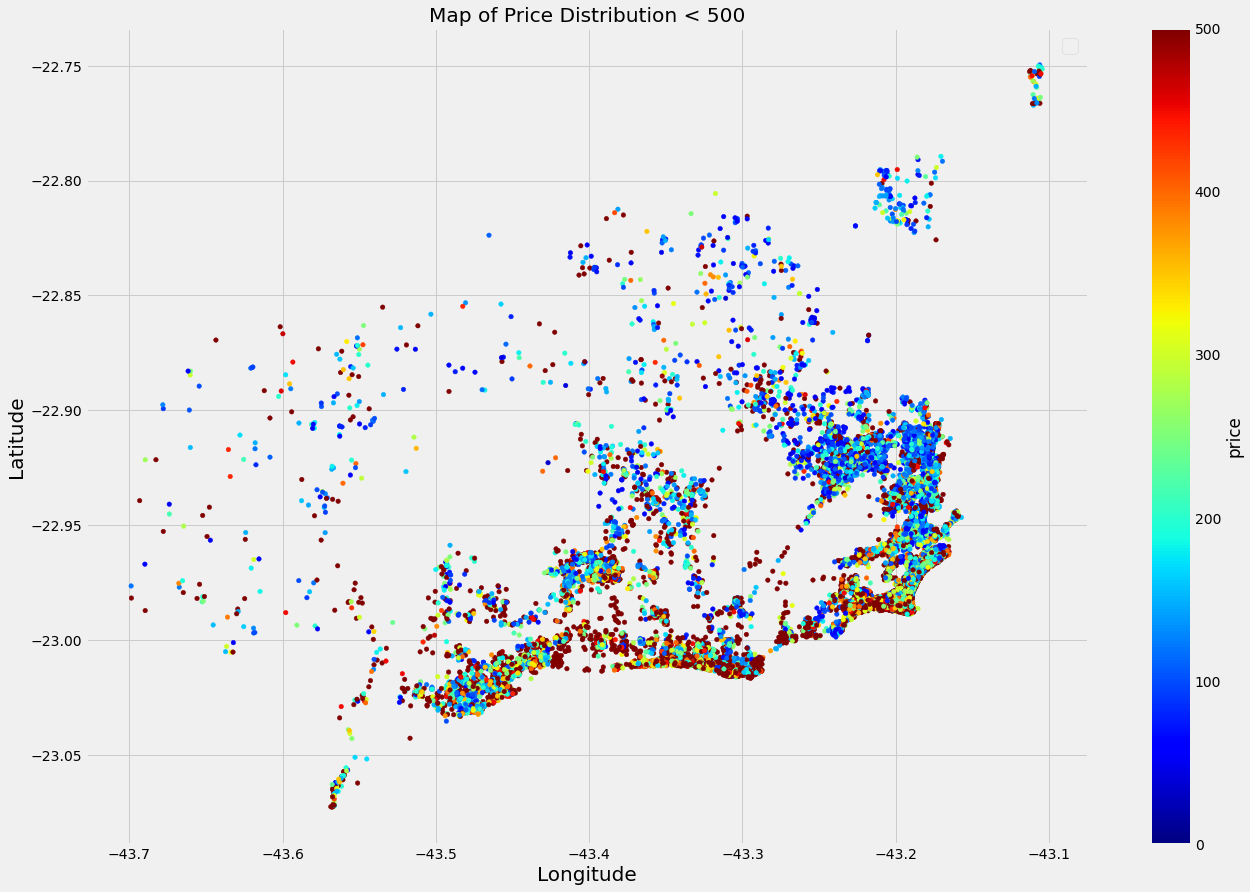

In [13]:


# plot the data
ax = rj_df.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(20,14),
    c="price", 
    cmap=plt.get_cmap("jet"),
    norm = plt.Normalize(0, 500),

    colorbar=True, 
    alpha=1,
)
# use our map with it's bounding coordinates
          
# add axis labels
plt.ylabel("Latitude", fontsize=20)
plt.xlabel("Longitude", fontsize=20)

# set the min/max axis values - these must be the same as above
plt.title("Map of Price Distribution < 500")
plt.legend(fontsize=20)
plt.show()

Map of Neighbourhood group - Zonas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


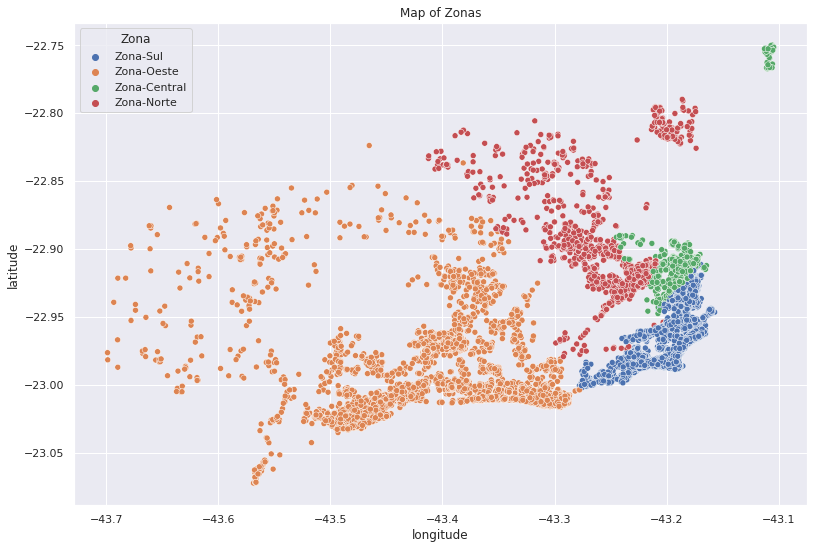

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot('longitude', 'latitude', data=rj_df, hue='Zona' )
plt.title('Map of Zonas')
plt.show()

Room Details

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


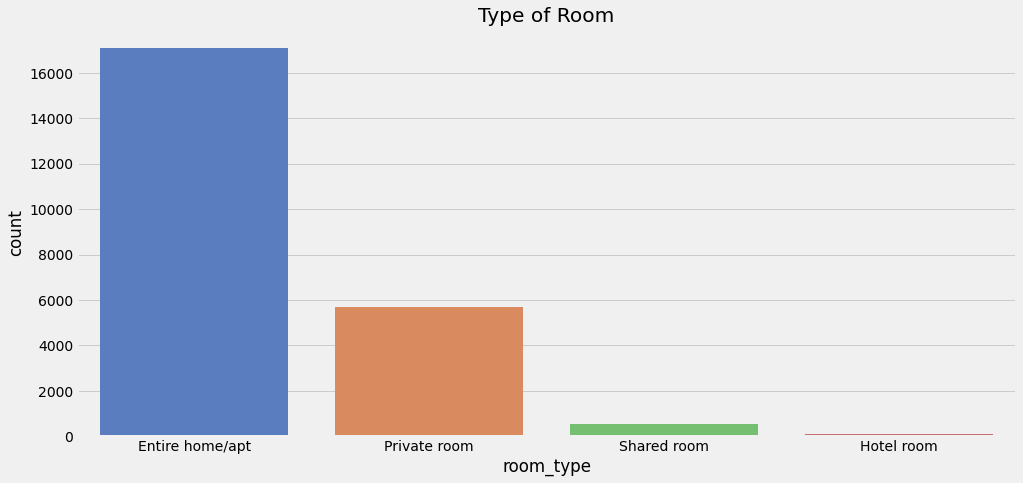

In [ ]:
plt.figure(figsize=(15,7))

plt.title("Type of Room")

sns.countplot(rj_df.room_type, palette="muted")
fig = plt.gcf()

plt.show()

Room type on Neighbourhood Group "Zona"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


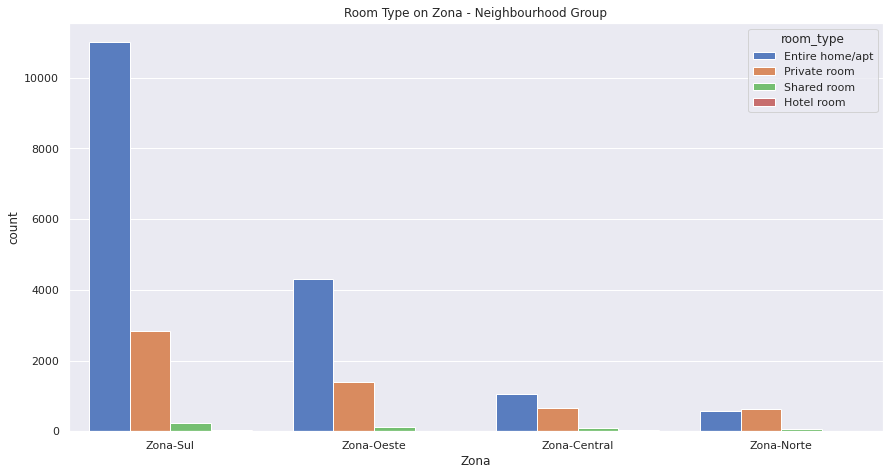

In [31]:
plt.figure(figsize=(13,7))

plt.title("Room Type on Zona - Neighbourhood Group")

sns.countplot(rj_df.Zona,hue=rj_df.room_type,palette="muted")

Zona vs. Availability Room

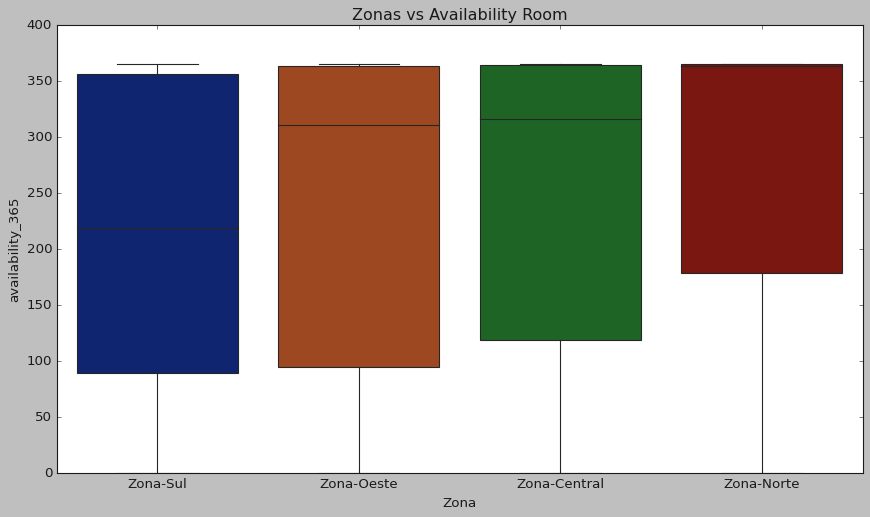

In [33]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Zonas vs Availability Room")

sns.boxplot(data=rj_df,x='Zona',y='availability_365',palette="dark")

plt.show()

Zonas Price Distribution

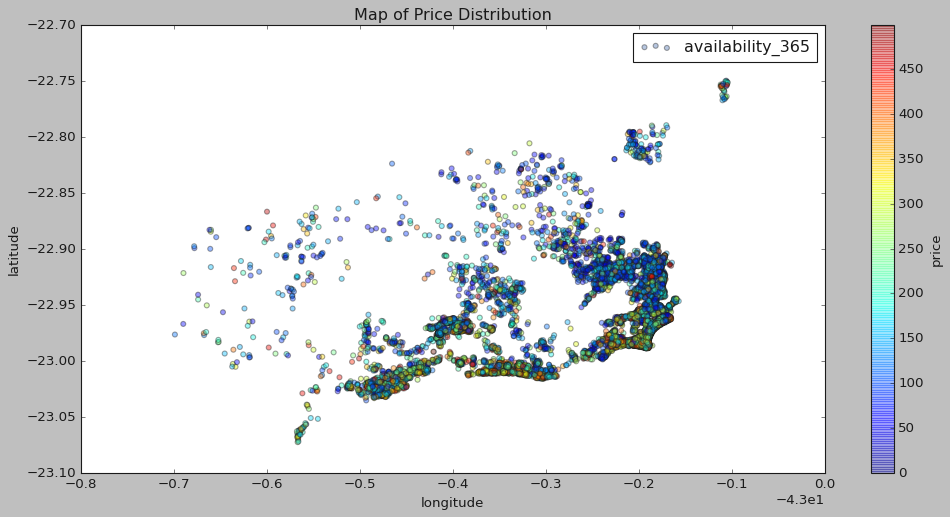

In [49]:


ax=rj_df[rj_df.price<500].plot(kind='scatter', figsize=(15,7),x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Map of Price Distribution")

ax.legend()
plt.ioff()
plt.show()

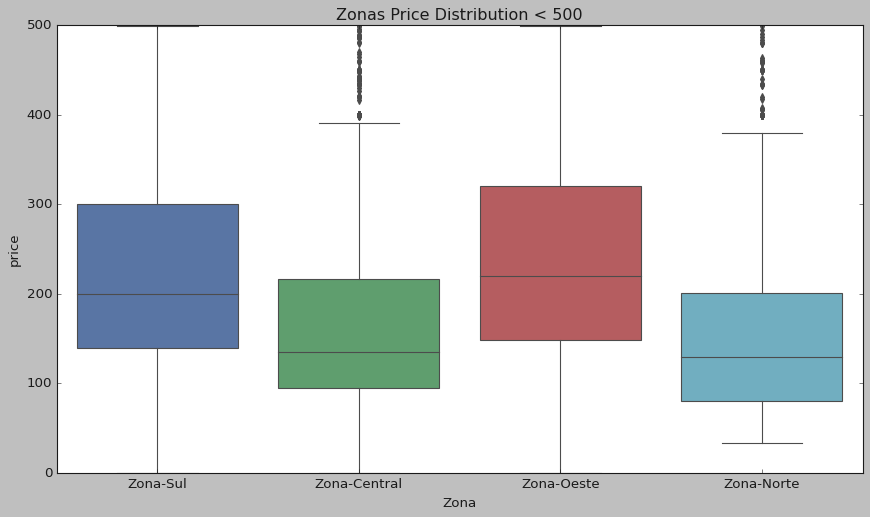

In [51]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Zonas Price Distribution < 500")
sns.boxplot(y="price",x ='Zona', data = rj_df[rj_df.price<500])
plt.show()

Price Prediction


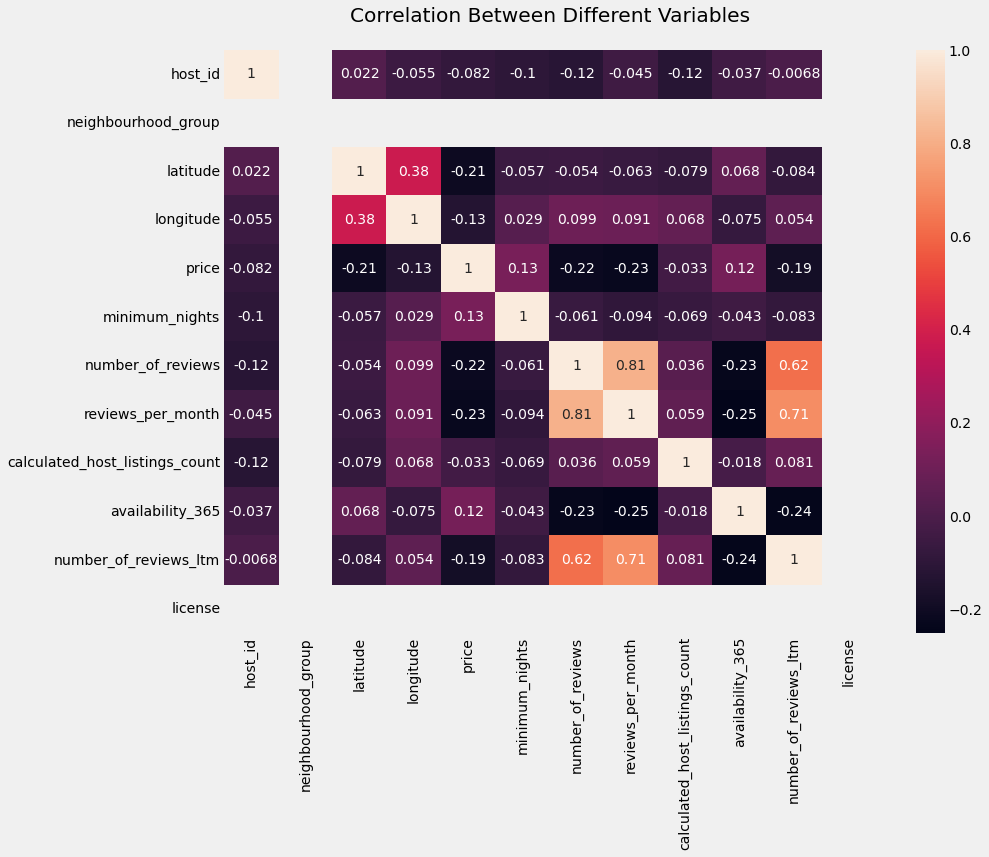

In [ ]:
corr = rj_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()